## Dimensionality Reduction - PCA (Principal Component Analysis) ##

Steps:

1. Import important libraraies.

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

2. Determine the optimal number of principal components using the explained variance ratio.

In [8]:
df = pd.read_csv("../data/heart_disease.csv")
X = df.drop('num', axis=1)
y = df['num']

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print("Original number of features:", X.shape[1])
print("Reduced number of features after PCA:", X_pca.shape[1])


Original number of features: 20
Reduced number of features after PCA: 13


3. Visualize PCA results using a scatter plot and cumulative variance plot.

-  cumulative variance plot

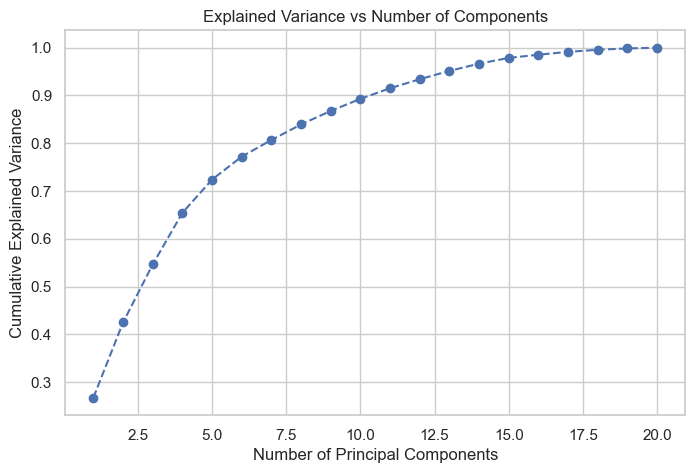

In [9]:
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

-  scatter plot

[0.26729601 0.15739247 0.1215409  0.10798331 0.06963363 0.04799615
 0.03486964 0.03261602 0.02825356 0.02517682 0.02235044 0.01881878
 0.01744497 0.01509823 0.01211682 0.00666522 0.0059575  0.00437641
 0.00281508 0.00159804] 



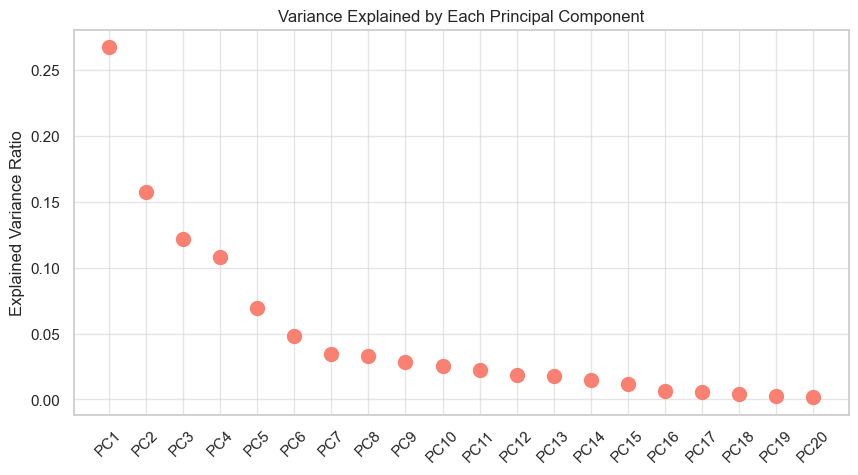

In [10]:
pca = PCA()
pca.fit(X)
explained_var = pca.explained_variance_ratio_
components = [f'PC{i+1}' for i in range(len(explained_var))]

plt.figure(figsize=(10,5))
plt.scatter(components, explained_var, color='salmon', s=100)
plt.xticks(rotation=45)
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.grid(True, alpha=0.5)
plt.show()

4. Visualizing the top 13 contributing features.

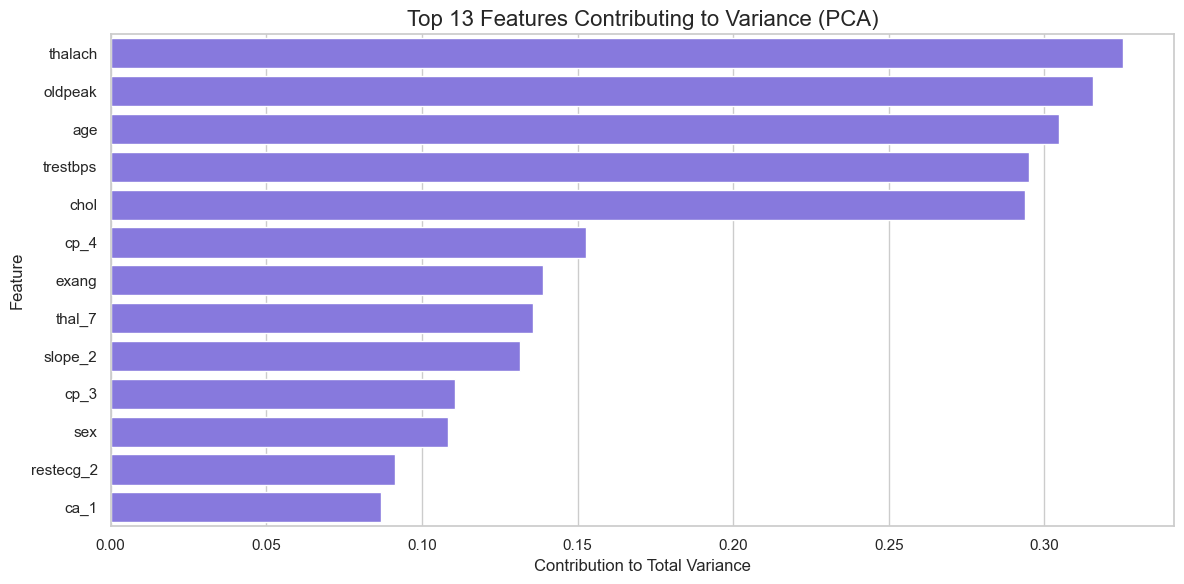

In [11]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)

loadings = pd.DataFrame(np.abs(pca.components_), columns=X.columns)
feature_contribution = (loadings * explained_var[:, np.newaxis]).sum(axis=0)
feature_contribution = feature_contribution.sort_values(ascending=False).head(13)

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x=feature_contribution.values, y=feature_contribution.index, color="mediumslateblue")

plt.title("Top 13 Features Contributing to Variance (PCA)", fontsize=16)
plt.xlabel("Contribution to Total Variance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()



5. Save the changes

In [12]:
top_features = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol', 'cp_4', 'exang', 'thal_7', 'slope_2', 'cp_3', 'sex', 'restecg_2', 'ca_1']
reduced_df = df[top_features + ['num']]
reduced_df.to_csv("../data/heart_disease.csv", index=False)